Danny Ryan

Lab 11

3/24/2020

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

#This part of networkx, for community detection, needs to be imported separately.
from networkx.algorithms import community 

from collections import Counter
import operator
from operator import itemgetter
fn = "https://drive.google.com/uc?export=download&id=1cwiW8N13ueTSDfjkJQ9BIK1Nvev3M4e4"
df = pd.read_csv(fn)
print(df.describe)

<bound method NDFrame.describe of                                    orgname                              selected_peers_concat
0             Abilene Christian University  Alaska Pacific University|Azusa Pacific Univer...
1     Abraham Baldwin Agricultural College  Gordon College|Middle Georgia College|Iowa Lak...
2                      Adams State College  Arizona State University|Northern Arizona Univ...
3                       Adelphi University  University of San Diego|University of San Fran...
4             Adirondack Community College  Cayuga County Community College|Clinton Commun...
...                                    ...                                                ...
1680                York Technical College  Aiken Technical College|Technical College of t...
1681                  Young Harris College  LaGrange College|Reinhardt University|Brevard ...
1682           Youngstown State University  University of Arkansas at Little Rock|Central ...
1683                      

In [ ]:
edges = []

for index, row in df.iterrows():
  curr_school = row['orgname']
  peers = row['selected_peers_concat'].split('|')

  for peer in peers:
    edges.append((curr_school, peer))

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(curr_school)
G.add_edges_from(edges)

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 3331
Number of edges: 37850
Average in degree:  11.3630
Average out degree:  11.3630


In [ ]:
density = nx.density(G)
print("density: " ,density)


density:  0.003412298518873121


In [ ]:
total_possible = G.number_of_nodes()*(G.number_of_nodes()-1)
density_hand = G.number_of_edges()/total_possible
density_hand

0.003412298518873121

Overall, this feels like a low density, but I am also not suprised. While we have not seen too many examples to really determine what is dense and what is not, having under 0.4 % of the possible edges exist in the graph feels like low density. This could be expected, as this data set contained many schools and peers, and while there should be some overlap based of the sheer size the data must be at least a little sparse


In [ ]:
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')
out_degree_dict = dict(G.out_degree(G.nodes()))
nx.set_node_attributes(G, out_degree_dict, 'out_degree')
between_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, between_dict, 'betweenness')
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [ ]:
G.nodes['Elon University']

{'betweenness': 0.0004925277652967203,
 'eigenvector': 0.00504641772313647,
 'in_degree': 55,
 'out_degree': 11}

In [ ]:
G.nodes['Bates College']

{'betweenness': 7.567213319445037e-05,
 'eigenvector': 0.1254240901361504,
 'in_degree': 37,
 'out_degree': 21}

In [ ]:
G.nodes["Oberlin College"]

{'betweenness': 0.0001522447679884614,
 'eigenvector': 0.20993833745194554,
 'in_degree': 56,
 'out_degree': 16}

Both oberlin and bates had higher scores for their eigenvectors than elon. One factor that could have led to this was Elon's out degree only being 11, which means they only identified 11 schools as as "peer," which theoretically should lessen their eigenvalue score as this limits their potential to connect to other highly connected nodes. Bates college scored signifigantly higher in the betweeness rank for the three schools, and I belive that could deal with location inside the US. The northesat is incredibly dense with universities, so it would make sense Bates is in the middle of many of the shortest paths for those schools compared to universities in Ohio and North Carolina.

In [ ]:
sorted_between = sorted(between_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness:")
for x in sorted_between[:10]:
    print(x)

Top 10 nodes by betweenness:
('Southwestern College', 0.03150062642448661)
('Community College of Philadelphia', 0.027124171464884175)
('Fort Valley State University', 0.02074513214329007)
('Bethany College', 0.019157964920291558)
('Rutgers University-New Brunswick', 0.01699888883495302)
('University of Phoenix-Online Campus', 0.016789793773116873)
('Arkansas State University-Main Campus', 0.014603234777118054)
('South Texas College', 0.01438266853459482)
('Union College', 0.014186901183255432)
('Abilene Christian University', 0.013939760736902474)


In [ ]:
sorted_in = sorted(in_degree_dict.items(), key= itemgetter(1), reverse = True)
print("Top 10 nodes by in_degree:")
for x in sorted_in[:10]:
  print(x)

Top 10 nodes by in_degree:
('Capella University', 77)
('Wheaton College', 72)
('Grand Canyon University', 68)
('Ashford University', 67)
('Daniel Webster College', 64)
('Strayer University-District of Columbia', 63)
('DeVry University-Illinois', 62)
('DeVry University-Florida', 62)
('Carleton College', 62)
('American InterContinental University-Online', 62)


In [ ]:
sorted_out = sorted(out_degree_dict.items(), key = itemgetter(1), reverse = True)
print("Top 10 noes by out_degree:")
for x in sorted_out[:10]:
  print(x)

Top 10 noes by out_degree:
('Iowa State University', 100)
('Indiana Wesleyan University', 99)
('Rio Salado College', 99)
('The University of Tampa', 99)
('Lander University', 99)
('Bainbridge College', 98)
('Bowdoin College', 98)
('Trevecca Nazarene University', 98)
('Central Wyoming College', 98)
('Guam Community College', 98)


In [ ]:
sorted_eigen = sorted(eigenvector_dict.items(), key = itemgetter(1), reverse = True)
print("Top 10 nodes by eigenvector centrality:")
for x in sorted_eigen[:10]:
  print(x)

Top 10 nodes by eigenvector centrality:
('Carleton College', 0.22381947128202603)
('Oberlin College', 0.20993833745194554)
('Williams College', 0.20854439091370394)
('Bowdoin College', 0.202694626957339)
('Amherst College', 0.19843583387702363)
('Middlebury College', 0.19584429276801382)
('Swarthmore College', 0.18788361090163005)
('Pomona College', 0.18361392091158701)
('Wesleyan University', 0.1809491437158842)
('Haverford College', 0.17069481538128295)


Overall, the four lists appear to be very different, and that is becuase of the different methedolgies used for calulating each measure. The degree centraility just measures how many connections each node has, and does not take into account any weighting factors of the attached nodes. On the other hand, both eigenvector centrality and closeness centrality take into account distance, and are closer related to betweeness centrality than the degree of centrality. 

Overall, I feel as though the most accurete method is the eigenvector centrality, as this takes into account how well connected one node is with the other nodes, but is also factors in the weights of the other nodes, which I believe is much more representative than a number only representing the raw number of connections.

In [ ]:
elon_friends = []
edges1 = G.edges()

In [ ]:
for e in edges1:
  if e[0] == 'Elon University':
    elon_friends.append(e[1])
  if e[1] == 'Elon University':
      elon_friends.append(e[0])


In [ ]:
elon_friends.append("Elon University")

In [ ]:

len(elon_friends)

67

In [ ]:
H=G.subgraph(elon_friends)

In [ ]:
print(nx.info(H))

Name: 
Type: DiGraph
Number of nodes: 63
Number of edges: 388
Average in degree:   6.1587
Average out degree:   6.1587


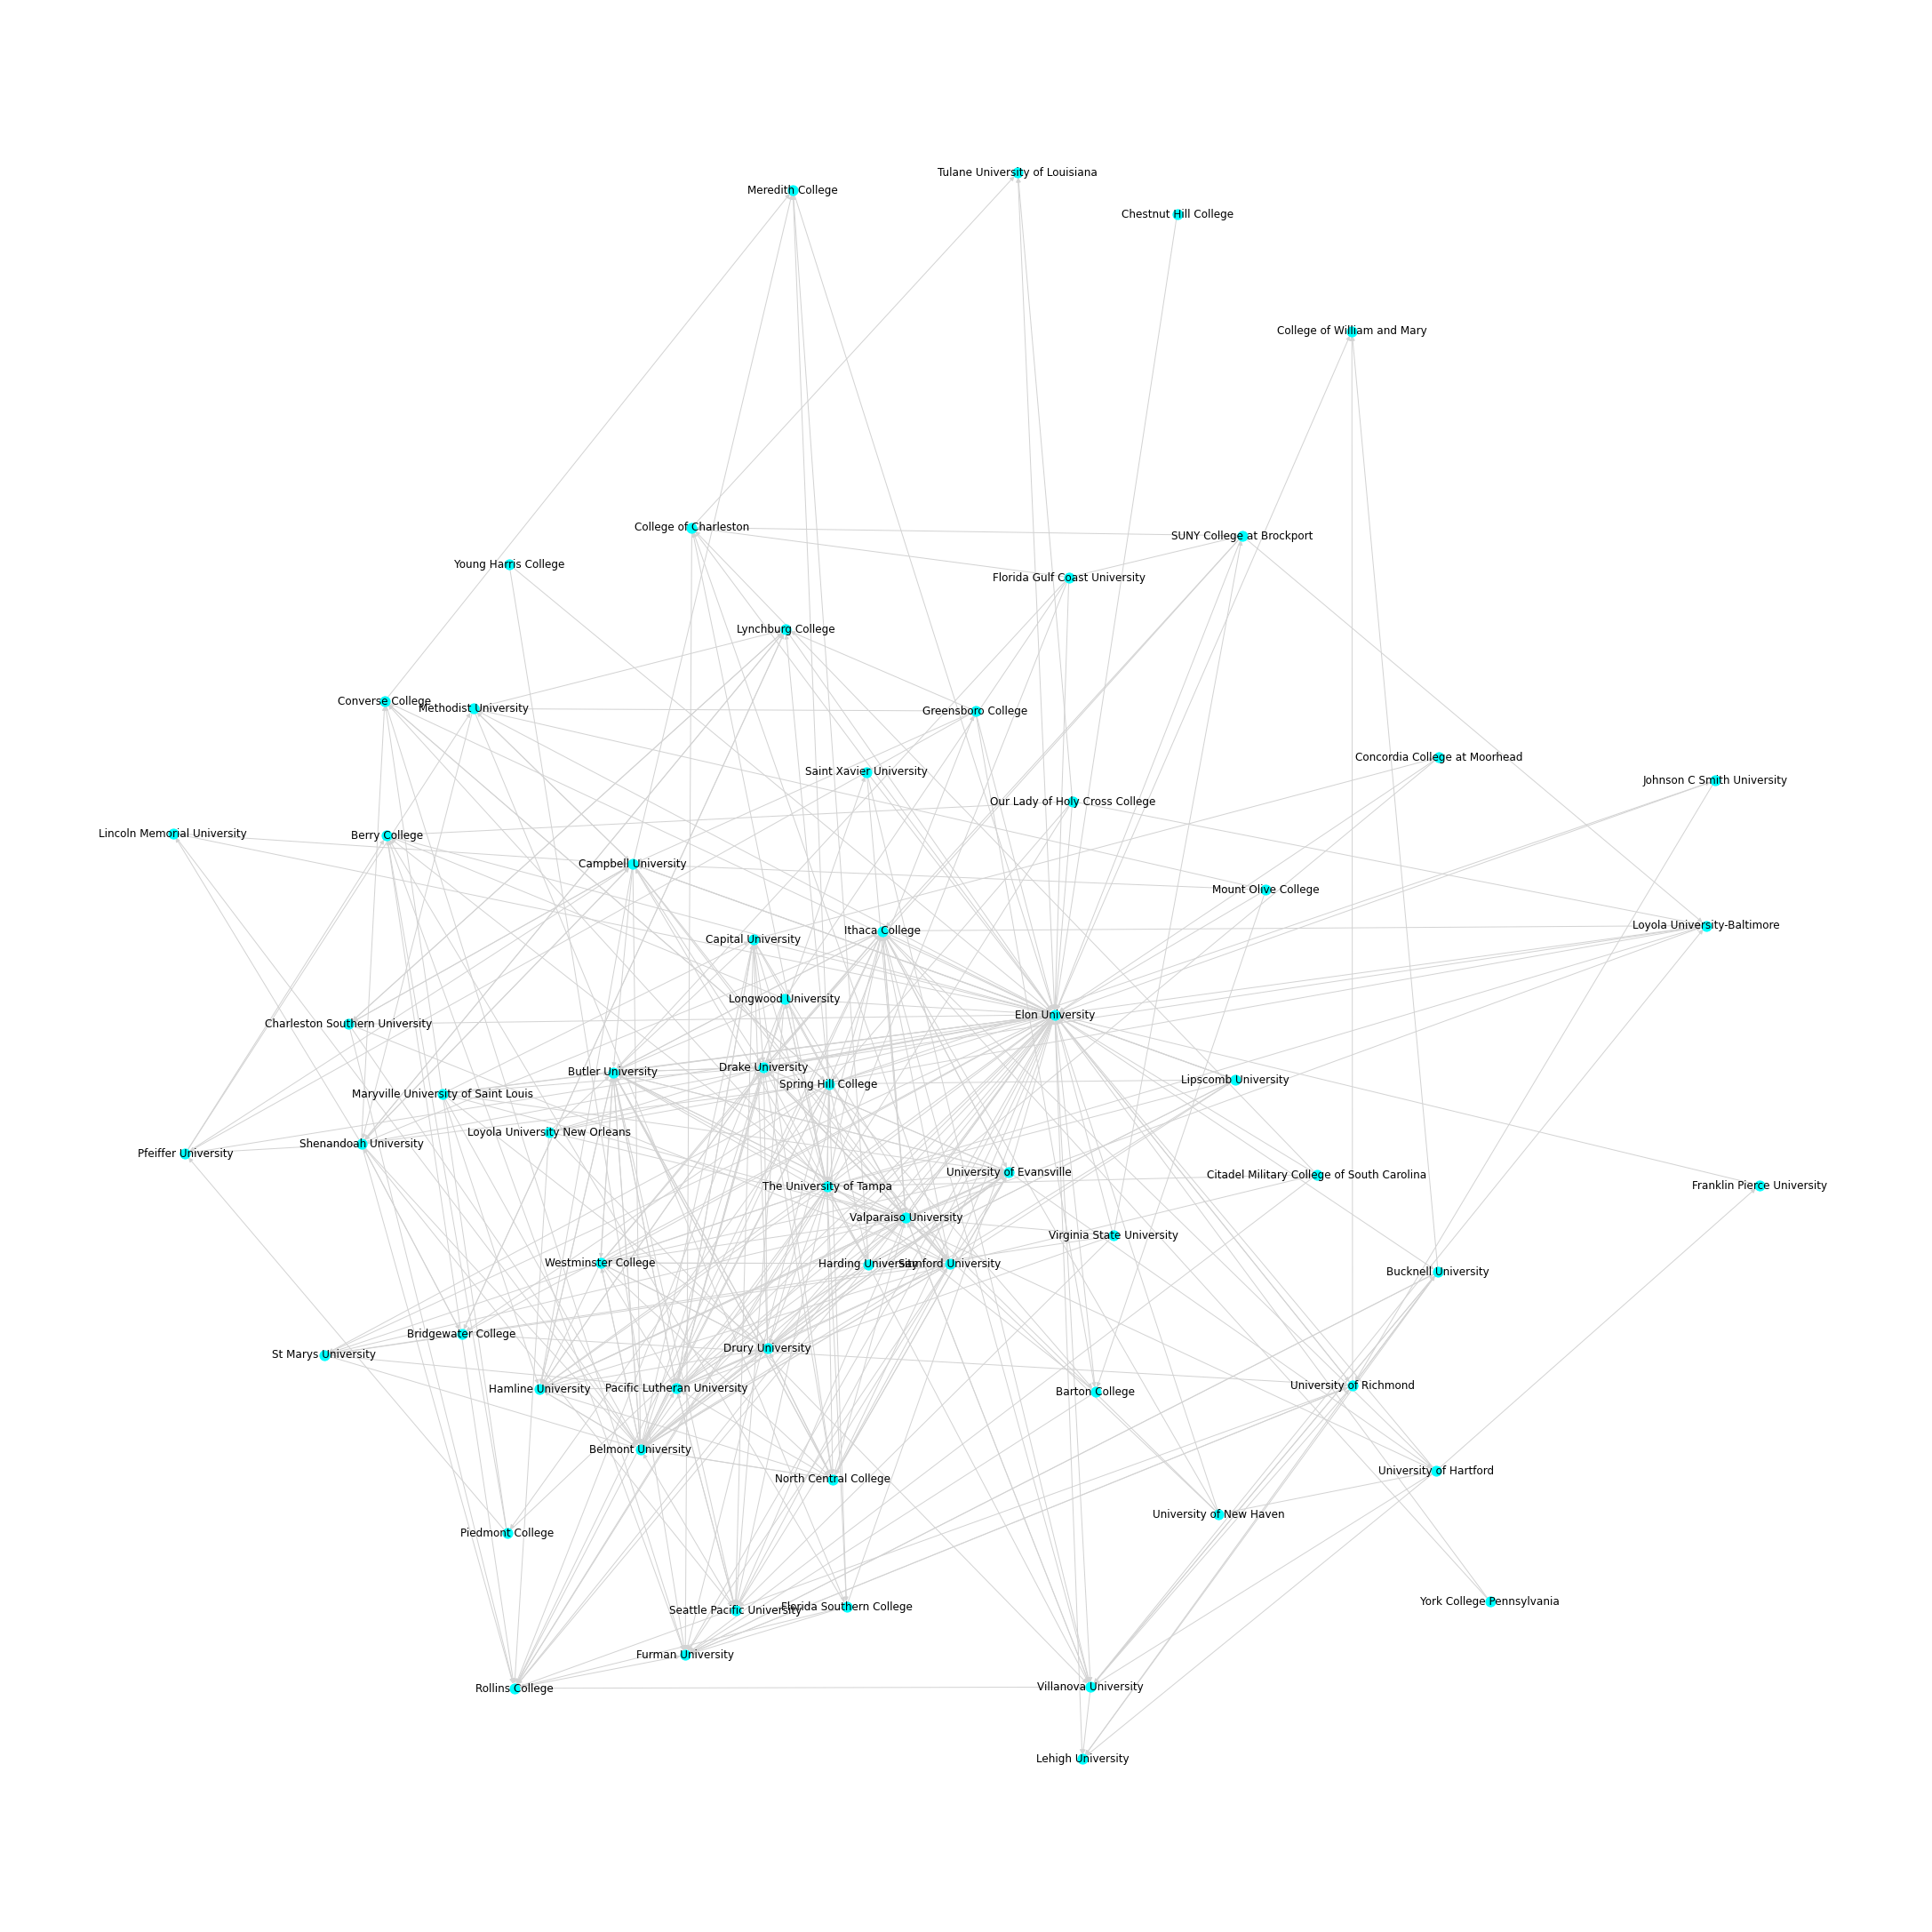

In [ ]:
plt.figure(figsize=(30,30))
pos = nx.spring_layout(H, k = 1)
nx.draw(H, pos = pos, with_labels= True, node_size = 125, edge_color="lightgrey", node_color= 'cyan')